In [12]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
import pandas as pd
import math
import seaborn as sns 
sns.set(color_codes=True)

# Machine Learning: Unsupervised Learning, Agents
## Part 5: Application of unsupervised learning
### Data extraction and cleanup

In [13]:
# Extract data
df = pd.read_csv("./data/cars.csv", sep=';')
df = df.drop(0)
df.reset_index(inplace=True, drop=True)

After importing our dataset, we have to clean it a little, convert types, and transform some values from the imperial system into the metric system.

The first column has to have unique values so we rename the duplicate by appending the year of the car and a (1) when it is not enough to make it unique.

In [14]:
df["MPG"] = df["MPG"].apply(lambda x: 0 if 0 == float(x) else round(235.215/float(x), 2))
df.rename(columns={"MPG": "L100"}, inplace=True)
df["Cylinders"] = df["Cylinders"].apply(lambda x: int(x))
df["Displacement"] = df["Displacement"].apply(lambda x: math.trunc(float(x) * 16.387064))
df["Horsepower"] = df["Horsepower"].apply(lambda x: float(x))
df["Weight"] = df["Weight"].apply(lambda x: math.trunc(int(x[:-1]) / 2.204623))
df["Acceleration"] = df["Acceleration"].apply(lambda x: float(x))
df["Model"] = df["Model"].apply(lambda x: str(1900 + int(x)))

# Rename duplicate
df.loc[df.duplicated(subset="Car", keep=False), "Car"] = df.loc[df.duplicated(subset="Car", keep=False), "Car"] + ' (' + df.loc[df.duplicated(subset="Car", keep=False), "Model"] + ')'
dup = df.duplicated(subset="Car", keep=False)
df.loc[df.duplicated(subset="Car"), "Car"] = df.loc[df.duplicated(subset="Car", keep=False), "Car"] + ' (1)'

# Convert model into integer
df["Model"] = df["Model"].apply(lambda x: int(x))

### Cleaning data: filling null values

In [15]:
df.replace(to_replace=0, value=np.nan, inplace=True)
# Calculate mean of all the values of the column KPL
l100 = round(df['L100'].mean())
# Calculate mean of all the values of the column Horsepower
hp = round(df['Horsepower'].mean())
# Replace the null value with the mean of the column
df.replace(np.nan, value={"L100": l100, "Horsepower": hp}, inplace=True)

### Means & Standard deviations

In [16]:
print("Means:\n", df.mean(), sep="")
print("\nStandard deviations:\n", df.std(), sep="")

Means:
L100              11.208768
Cylinders          5.475369
Displacement    3191.344828
Horsepower       105.081281
Weight          1345.825123
Acceleration      15.519704
Model           1975.921182
dtype: float64

Standard deviations:
L100               3.862984
Cylinders          1.712160
Displacement    1719.377328
Horsepower        38.480533
Weight           393.503273
Acceleration       2.803359
Model              3.748737
dtype: float64


/tmp/ipykernel_11724/4282765106.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Means:\n", df.mean(), sep="")
/tmp/ipykernel_11724/4282765106.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nStandard deviations:\n", df.std(), sep="")


### Outliers

[23.52 23.52 26.14]
[220.0 215.0 225.0 225.0 215.0 210.0 215.0 225.0 230.0]
[8.0 8.0 23.5 24.8 23.7 24.6]


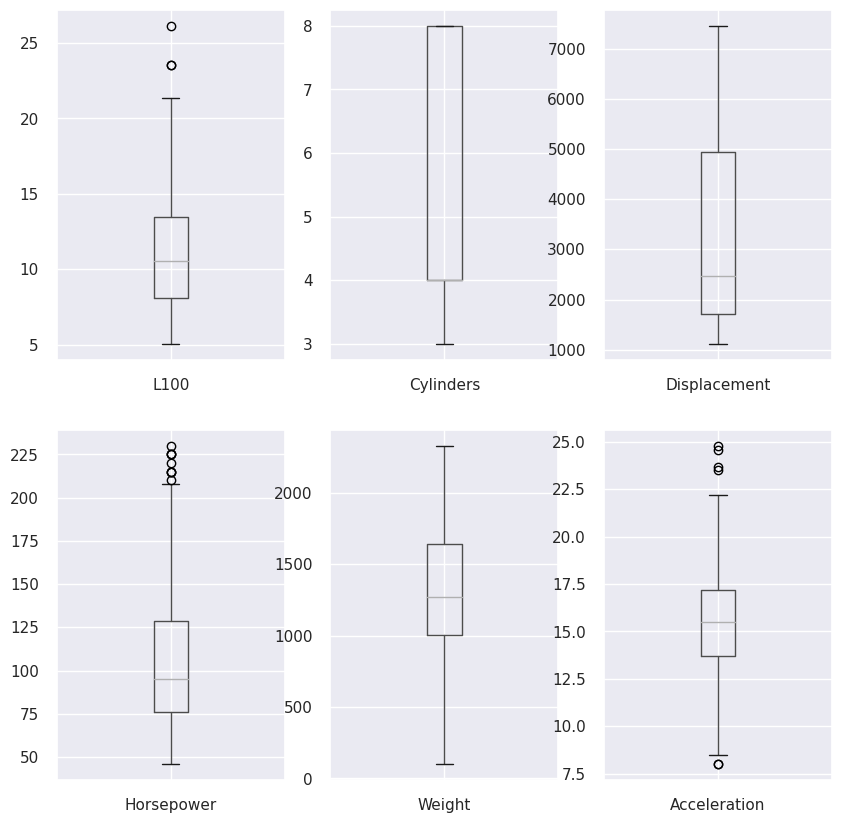

In [17]:
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(10)
fig.set_figheight(10)

_, bp1 = df.boxplot(column="L100", return_type='both', ax=axs[0, 0])
_, bp2 = df.boxplot(column="Cylinders", return_type='both', ax=axs[0, 1])
_, bp3 = df.boxplot(column="Displacement", return_type='both', ax=axs[0, 2])
_, bp4 = df.boxplot(column="Horsepower", return_type='both', ax=axs[1, 0])
_, bp5 = df.boxplot(column="Weight", return_type='both', ax=axs[1, 1])
_, bp6 = df.boxplot(column="Acceleration", return_type='both', ax=axs[1, 2])

outliers = [flier.get_ydata() for flier in bp1["fliers"]][0]
print(outliers)
outliers = [flier.get_ydata() for flier in bp4["fliers"]][0]
print(outliers)
outliers = [flier.get_ydata() for flier in bp6["fliers"]][0]
print(outliers)

### Correlation heatmap

/tmp/ipykernel_11724/2708669416.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/tmp/ipykernel_11724/2708669416.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.drop(["Model"], axis=1).corr()


<AxesSubplot: >

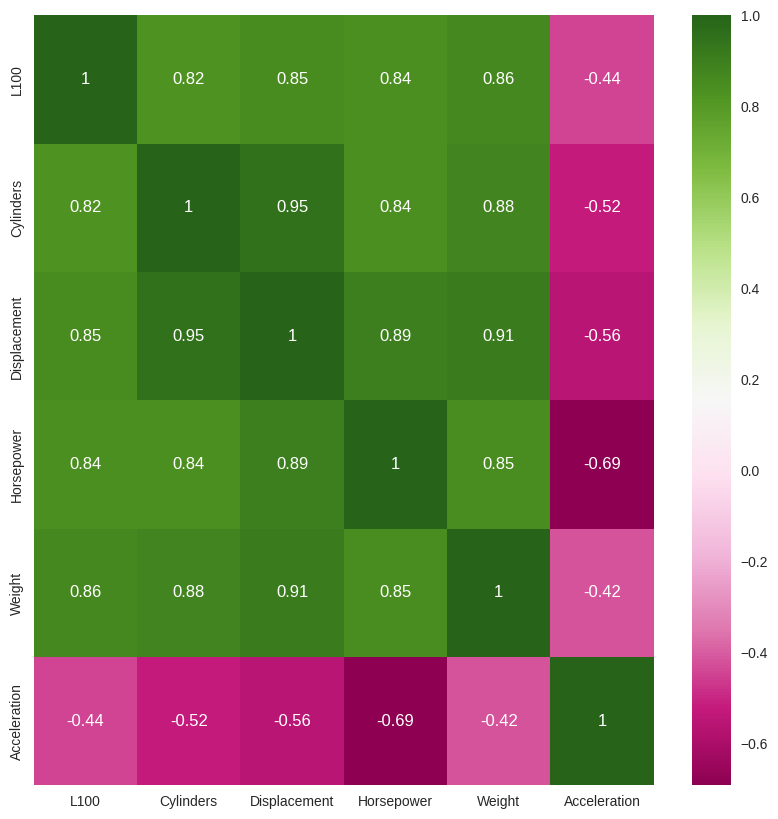

In [18]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn")
c = df.drop(["Model"], axis=1).corr()
sns.heatmap(c,cmap='PiYG',annot=True)

### Subplots

[Text(0.5, 0, 'Origin'), Text(0, 0.5, 'Horsepower')]

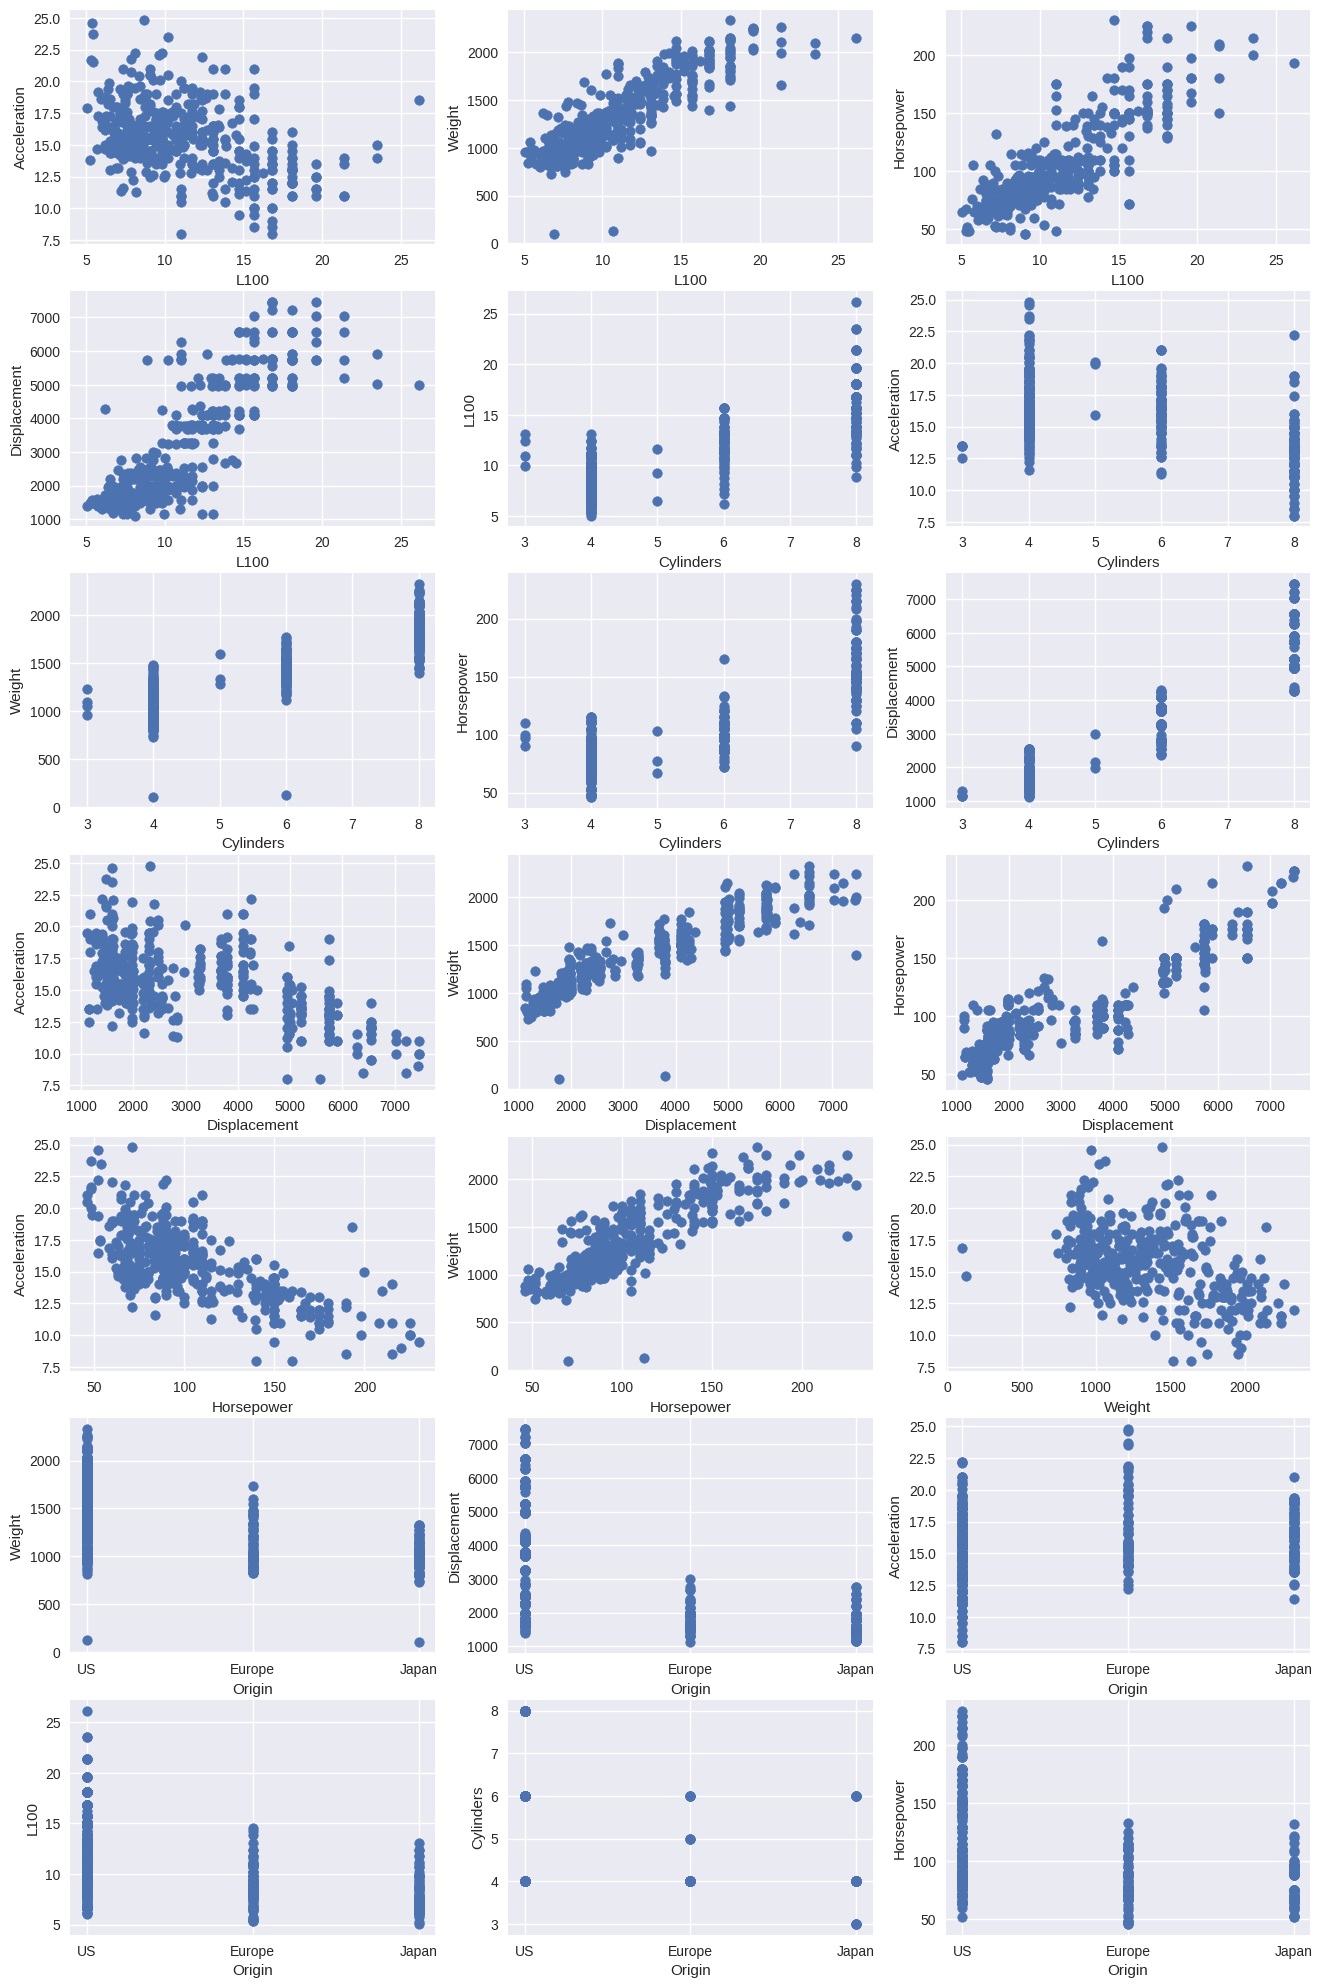

In [19]:
fig, axs = plt.subplots(7, 3)
fig.set_figwidth(16)
fig.set_figheight(25)

axs[0, 0].scatter(df["L100"], df["Acceleration"])
axs[0, 0].set(xlabel="L100", ylabel="Acceleration")
axs[0, 1].scatter(df["L100"], df["Weight"])
axs[0, 1].set(xlabel="L100", ylabel="Weight")
axs[0, 2].scatter(df["L100"], df["Horsepower"])
axs[0, 2].set(xlabel="L100", ylabel="Horsepower")
axs[1, 0].scatter(df["L100"], df["Displacement"])
axs[1, 0].set(xlabel="L100", ylabel="Displacement")
axs[1, 1].scatter(df["Cylinders"], df["L100"])
axs[1, 1].set(xlabel="Cylinders", ylabel="L100")
axs[1, 2].scatter(df["Cylinders"], df["Acceleration"])
axs[1, 2].set(xlabel="Cylinders", ylabel="Acceleration")
axs[2, 0].scatter(df["Cylinders"], df["Weight"])
axs[2, 0].set(xlabel="Cylinders", ylabel="Weight")
axs[2, 1].scatter(df["Cylinders"], df["Horsepower"])
axs[2, 1].set(xlabel="Cylinders", ylabel="Horsepower")
axs[2, 2].scatter(df["Cylinders"], df["Displacement"])
axs[2, 2].set(xlabel="Cylinders", ylabel="Displacement")
axs[3, 0].scatter(df["Displacement"], df["Acceleration"])
axs[3, 0].set(xlabel="Displacement", ylabel="Acceleration")
axs[3, 1].scatter(df["Displacement"], df["Weight"])
axs[3, 1].set(xlabel="Displacement", ylabel="Weight")
axs[3, 2].scatter(df["Displacement"], df["Horsepower"])
axs[3, 2].set(xlabel="Displacement", ylabel="Horsepower")
axs[4, 0].scatter(df["Horsepower"], df["Acceleration"])
axs[4, 0].set(xlabel="Horsepower", ylabel="Acceleration")
axs[4, 1].scatter(df["Horsepower"], df["Weight"])
axs[4, 1].set(xlabel="Horsepower", ylabel="Weight")
axs[4, 2].scatter(df["Weight"], df["Acceleration"])
axs[4, 2].set(xlabel="Weight", ylabel="Acceleration")
axs[5, 0].scatter(df["Origin"], df["Weight"])
axs[5, 0].set(xlabel="Origin", ylabel="Weight")
axs[5, 1].scatter(df["Origin"], df["Displacement"])
axs[5, 1].set(xlabel="Origin", ylabel="Displacement")
axs[5, 2].scatter(df["Origin"], df["Acceleration"])
axs[5, 2].set(xlabel="Origin", ylabel="Acceleration")
axs[6, 0].scatter(df["Origin"], df["L100"])
axs[6, 0].set(xlabel="Origin", ylabel="L100")
axs[6, 1].scatter(df["Origin"], df["Cylinders"])
axs[6, 1].set(xlabel="Origin", ylabel="Cylinders")
axs[6, 2].scatter(df["Origin"], df["Horsepower"])
axs[6, 2].set(xlabel="Origin", ylabel="Horsepower")

### Dimension reduction & prediction of the origin of the car

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Car", "Origin"], axis=1), df["Origin"], test_size=0.2)
X_train.head()

,L100,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
246,7.84,4,1589,67.0,900,16.4,1977
235,12.71,6,4096,98.0,1598,19.0,1977
106,13.07,6,3801,100.0,1335,16.0,1973
4,13.84,8,4948,140.0,1564,10.5,1970
393,6.19,4,1491,67.0,904,16.2,1982


[3.18660531e+06 2.69468582e+04 2.82036212e+02]


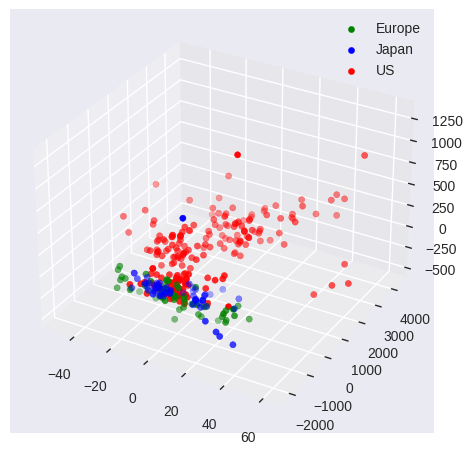

In [21]:
cdict = {"US": 'red', "Europe": 'green', "Japan": 'blue'}

# 3D PCA dimension reduction
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X_train, y_train)

print(pca.explained_variance_)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(data_pca[ix][:, 2], data_pca[ix][:, 0], data_pca[ix][:, 1], c=cdict[g], label=g)
ax.legend()

In [22]:
pipe = Pipeline([("PCA", PCA(n_components=3)),
                ('linear', LinearDiscriminantAnalysis())
])

pipe.fit(X_train, y_train)

us = [0, 0, 0]
eu = [0, 0, 0]
jp = [0, 0, 0]
p = pipe.predict(X_test)
results = np.stack((p, y_test), axis=1)
for prediction in results:
    if (prediction[1] == "US"):
            us[1]+=1
            if prediction[0] == prediction[1]:
                us[0]+=1
    if (prediction[1] == "Europe"):
            eu[1]+=1
            if prediction[0] == prediction[1]:
                eu[0]+=1
    if (prediction[1] == "Japan"):
            jp[1]+=1
            if prediction[0] == prediction[1]:
                jp[0]+=1
us[2] = us[0]/us[1]
eu[2] = eu[0]/eu[1]
jp[2] = jp[0]/jp[1]
print("US\t: {}/{} = {}%".format(us[0], us[1], round(us[2]*100, 1)))
print("Europe\t: {}/{} = {}%".format(eu[0], eu[1], round(eu[2]*100, 1)))
print("Japan\t: {}/{} = {}%".format(jp[0], jp[1], round(jp[2]*100, 1)))
print("Total score: {}%".format(round(pipe.score(X_test, y_test)*100, 1)))

US	: 40/52 = 76.9%
Europe	: 6/14 = 42.9%
Japan	: 10/16 = 62.5%
Total score: 68.3%


The model predicts with high precision US and Japanese cars. Since European cars are somewhat in the same ranges of Japanese cars, it has trouble precicting correctly European cars. Otherwhise the models very clearly beats chance.